In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
data=pd.read_csv("email.csv")

In [3]:
data.head()  

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.dropna()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Category"]=le.fit_transform(data["Category"])


In [ ]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()

# Fit and transform the Message column
X_tfidf = vectorizer.fit_transform(data['Message'])


print(X_tfidf.shape)

(5573, 8711)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=20, random_state=40)

In [37]:
model=MultinomialNB()
model.fit(x_train,y_train)


MultinomialNB()

In [38]:
y_pred=model.predict(x_test)   

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [40]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)    

1.0


In [41]:
precision=precision_score(y_test, y_pred)
print(precision)

1.0


In [42]:
classification=classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[15  0]
 [ 0  5]]


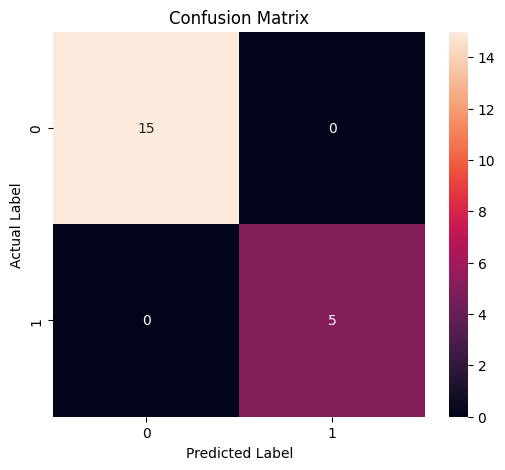

In [44]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()